# IRF
Compare three kinds of instrument response function (cauchy, gaussian, pseudo voigt)

In [1]:
# import needed module
import numpy as np
import matplotlib.pyplot as plt
from TRXASprefitpack import model_n_comp_conv
plt.rcParams["figure.figsize"] = (14,10)

## Define function for IRF
for pesudo voigt profile eta is chosen according to
 [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219)

In [2]:
def irf_cauchy(t, fwhm):
    gamma = fwhm/2
    return gamma/np.pi*1/(t**2+gamma**2)

def irf_gau(t, fwhm):
    sigma = fwhm/(2*np.sqrt(2*np.log(2)))
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(t/sigma)**2/2)

def irf_pvoigt(t, fwhm_L, fwhm_G):
    f = fwhm_G**5+2.69269*fwhm_G**4*fwhm_L+2.42843*fwhm_G**3*fwhm_L**2+ \
    +4.47163*fwhm_G**2*fwhm_L**3+0.07842*fwhm_G*fwhm_L**4+fwhm_L**5
    f = f**(1/5)
    eta = 1.36603*(fwhm_L/f)-0.47719*(fwhm_L/f)**2+0.11116*(fwhm_L/f)**3
    return eta*irf_cauchy(t, fwhm_L)+(1-eta)*irf_gau(t, fwhm_G)

In [3]:
# get basic information of model_n_comp_conv
help(model_n_comp_conv)

Help on function model_n_comp_conv in module TRXASprefitpack.mathfun.exp_decay_fit:

model_n_comp_conv(t, fwhm, tau, c, base=True, irf='g', eta=None)
    model for n component fitting
    n exponential function convolved with irf; 'g': normalized gaussian distribution, 'c': normalized cauchy distribution, 'pv': pseudo voigt profile :math:`(1-\eta)g + \eta c`
    
    :param numpy_1d_array t: time
    :param numpy_1d_array fwhm: fwhm of X-ray temporal pulse, if irf == 'g' or 'c' then fwhm = [fwhm], if irf == 'pv' then fwhm = [fwhm_G, fwhm_L]
    :param numpy_1d_array tau: life time for each component
    :param numpy_1d_array c: coefficient
     (num_comp+1,) if base=True
     (num_comp,)   if base=False
    :param base: whether or not include baseline [default: True]
    :type base: bool, optional
    :param irf: shape of instrumental response function [default: g], 
     'g': normalized gaussian distribution, 
     'c': normalized cauchy distribution, 
     'pv': pseudo voigt profile 

## Compare cauchy and gaussian IRF with same fwhm

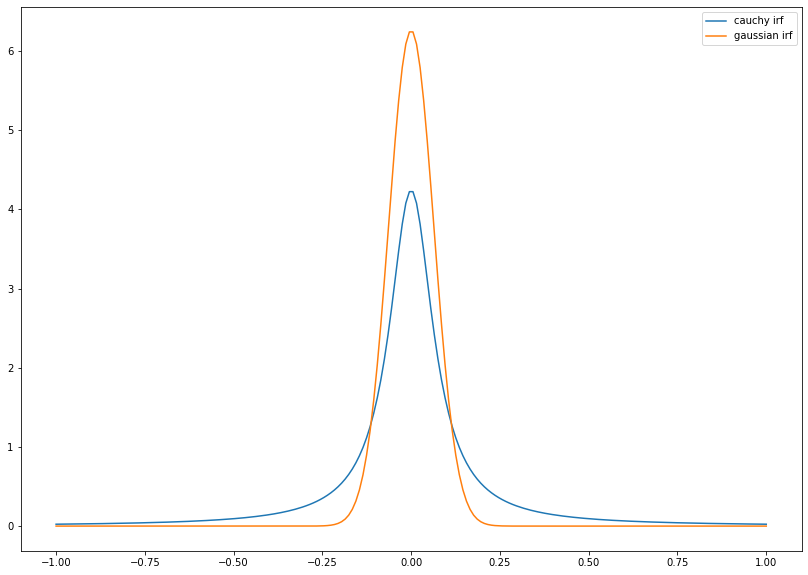

In [4]:
fwhm = 0.15 # 150 fs
t = np.linspace(-1,1,200)
cauchy = irf_cauchy(t,fwhm)
gau = irf_gau(t,fwhm)
plt.plot(t, cauchy, label='cauchy irf')
plt.plot(t, gau, label='gaussian irf')
plt.legend()
plt.show()

Cauchy irf is more diffuse then Gaussian irf

## Compare pseudo voigt irf with different combination of (fwhm_L, fwhm_G)
1. (0.125, 0.025)
2. (0.075, 0.075)
3. (0.025, 0.125)

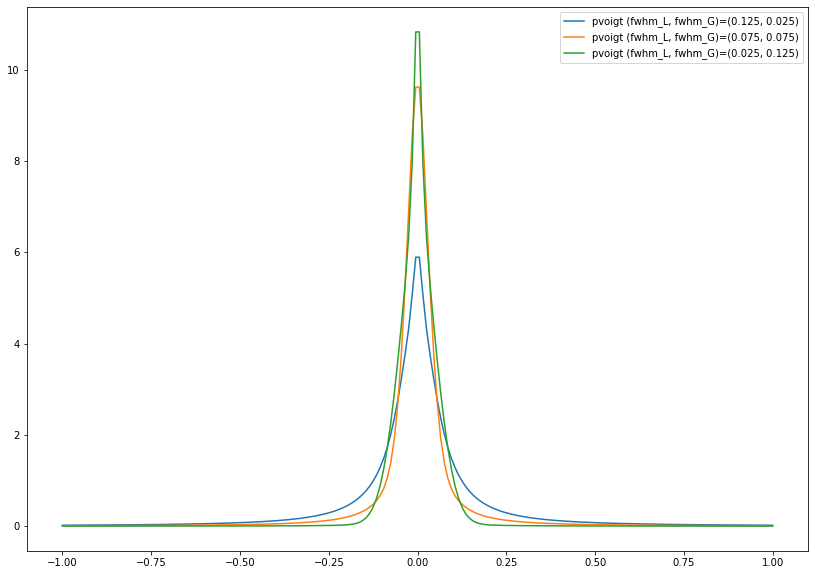

In [5]:
pvoigt1 = irf_pvoigt(t, 0.125, 0.025)
pvoigt2 = irf_pvoigt(t, 0.075, 0.075)
pvoigt3 = irf_pvoigt(t, 0.025, 0.125)
plt.plot(t, pvoigt1, label='pvoigt (fwhm_L, fwhm_G)=(0.125, 0.025)')
plt.plot(t, pvoigt2, label='pvoigt (fwhm_L, fwhm_G)=(0.075, 0.075)')
plt.plot(t, pvoigt3, label='pvoigt (fwhm_L, fwhm_G)=(0.025, 0.125)')
plt.legend()
plt.show()

## Compare baseline signal (IRF: cauchy, gaussian with same fwhm=0.15)

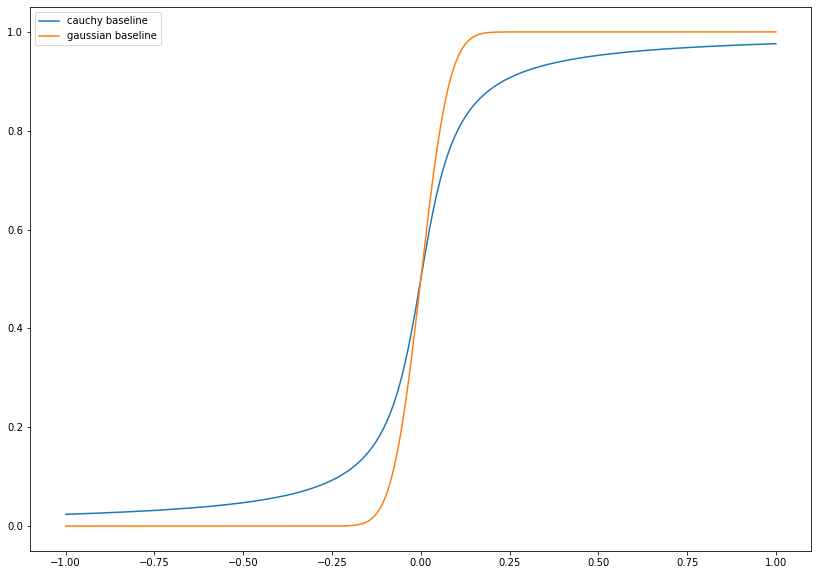

In [6]:
fwhm = np.array([0.15])
tau = np.zeros(0)
c = np.ones(1)
cauchy_baseline = model_n_comp_conv(t, fwhm, tau, c, base=True, irf='c')
gauss_baseline = model_n_comp_conv(t, fwhm, tau, c, base=True, irf='g')
plt.plot(t, cauchy_baseline, label='cauchy baseline')
plt.plot(t, gauss_baseline, label='gaussian baseline')
plt.legend()
plt.show()

gaussian baseline is sharper than cauchy baseline

## Compare pseudo voigt baseline with different combination of (fwhm_L, fwhm_G)
1. (0.125, 0.025)
2. (0.075, 0.075)
3. (0.025, 0.125)

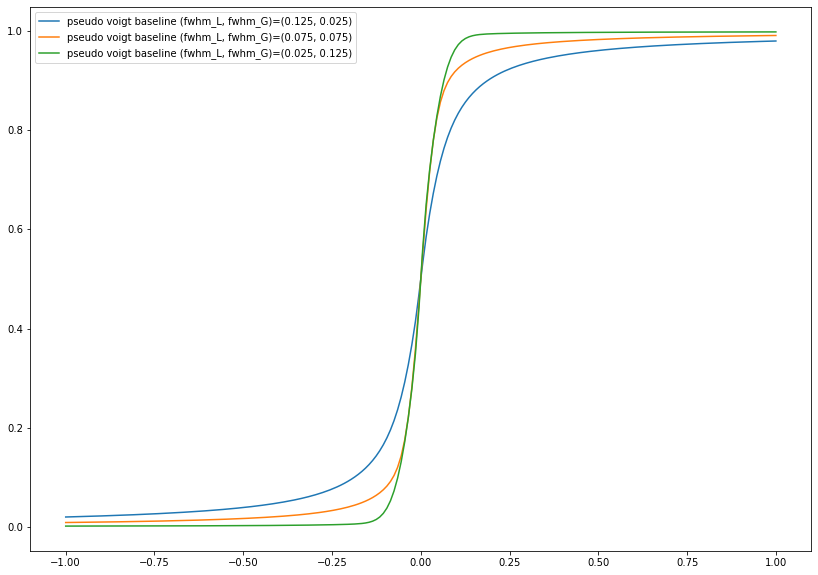

In [7]:
fwhm1 = np.array([0.025, 0.125])
fwhm2 = np.array([0.075, 0.075])
fwhm3 = np.array([0.125, 0.025])
tau = np.zeros(0)
c = np.ones(1)
pv1_baseline = model_n_comp_conv(t, fwhm1, tau, c, base=True, irf='pv')
pv2_baseline = model_n_comp_conv(t, fwhm2, tau, c, base=True, irf='pv')
pv3_baseline = model_n_comp_conv(t, fwhm3, tau, c, base=True, irf='pv')
plt.plot(t, pv1_baseline, label='pseudo voigt baseline (fwhm_L, fwhm_G)=(0.125, 0.025)')
plt.plot(t, pv2_baseline, label='pseudo voigt baseline (fwhm_L, fwhm_G)=(0.075, 0.075)')
plt.plot(t, pv3_baseline, label='pseudo voigt baseline (fwhm_L, fwhm_G)=(0.025, 0.125)')
plt.legend()
plt.show()

As lorenzian (cauchy) character smaller, sharper the baseline.

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=fwhm/2)

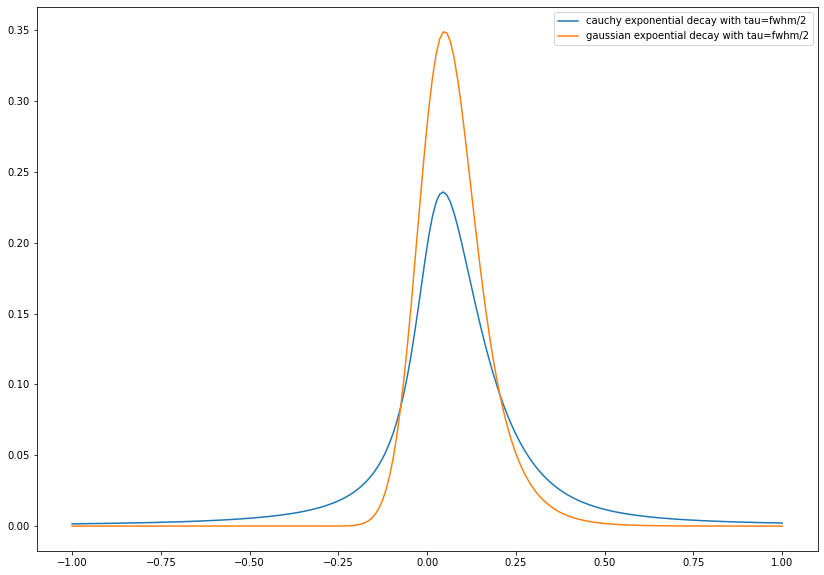

In [8]:
fwhm = np.array([0.15])
tau = np.array([fwhm[0]/2])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm/2')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm/2')
plt.legend()
plt.show()

if tau: time constant is less than irf, we can only see little portion of exponetial decay feature. 

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=fwhm)

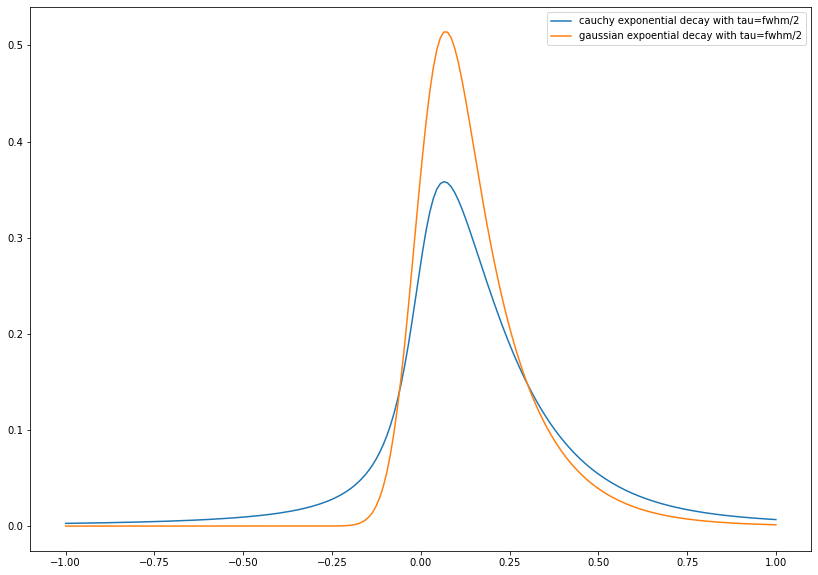

In [9]:
fwhm = np.array([0.15])
tau = np.array([fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm/2')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm/2')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=2fwhm)

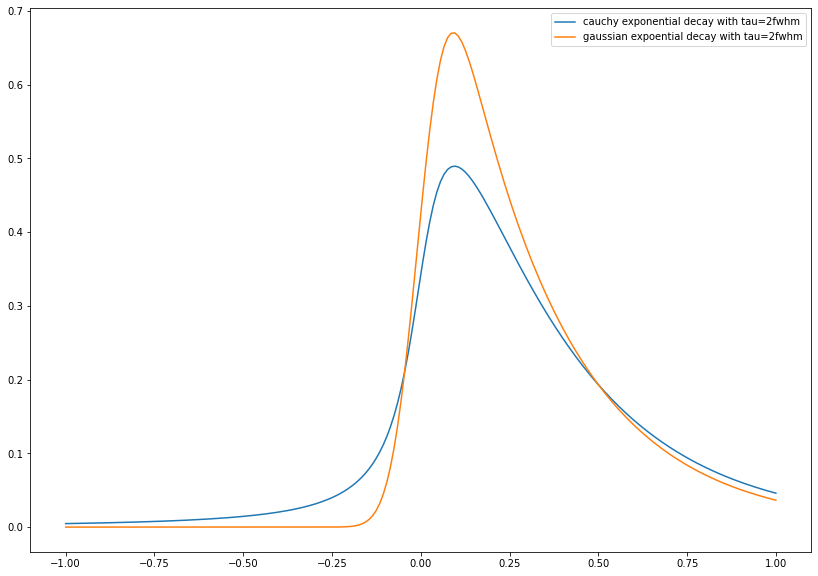

In [10]:
fwhm = np.array([0.15])
tau = np.array([2*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=2fwhm')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=2fwhm')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=10fwhm)

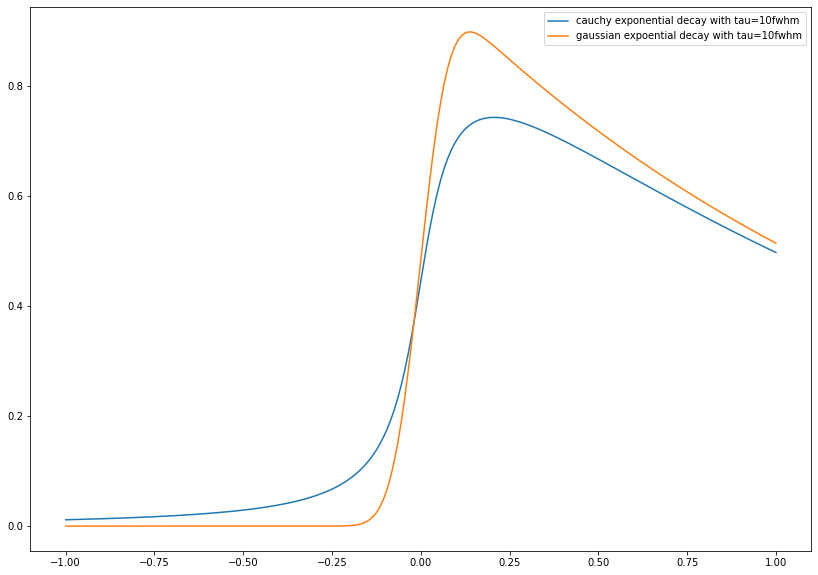

In [11]:
fwhm = np.array([0.15])
tau = np.array([10*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=10fwhm')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=10fwhm')
plt.legend()
plt.show()

## Compare exponential decay convolved with irf(cauchy, gaussian) with (tau=0.1fwhm)

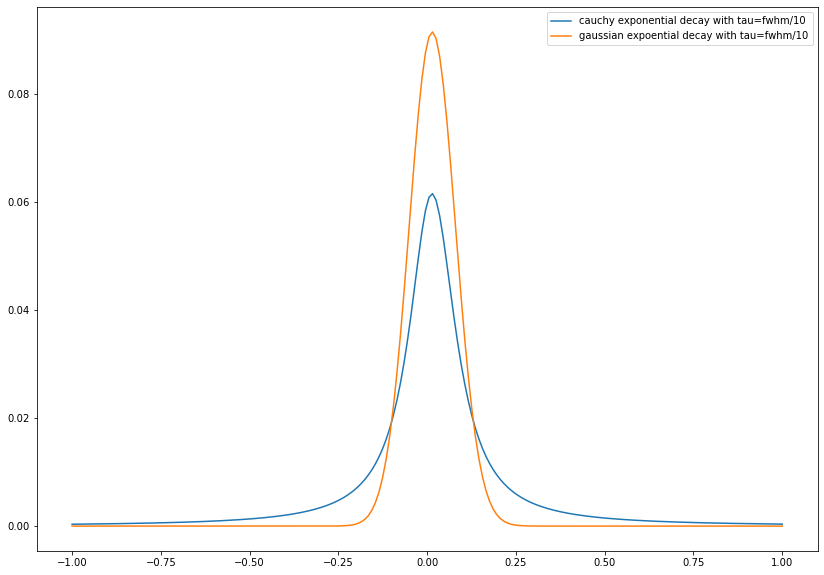

In [12]:
fwhm = np.array([0.15])
tau = np.array([0.1*fwhm[0]])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau=fwhm/10')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau=fwhm/10')
plt.legend()
plt.show()

signal is very small and we can only see irf feature.

## 3rd generation x-ray source with fs dynamics

* fwhm = 80 ps
* tau1 = 300 fs
* tau2 = 3 ps
* tau3 = 30 ps

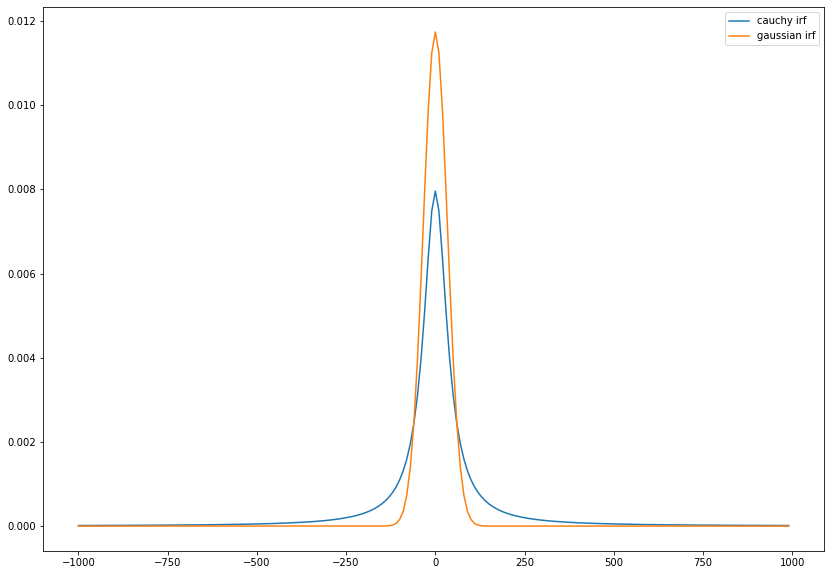

In [13]:
fwhm = 80 # 80 ps
t = np.arange(-1000, 1000, 10)
cauchy = irf_cauchy(t,fwhm)
gau = irf_gau(t,fwhm)
plt.plot(t, cauchy, label='cauchy irf')
plt.plot(t, gau, label='gaussian irf')
plt.legend()
plt.show()

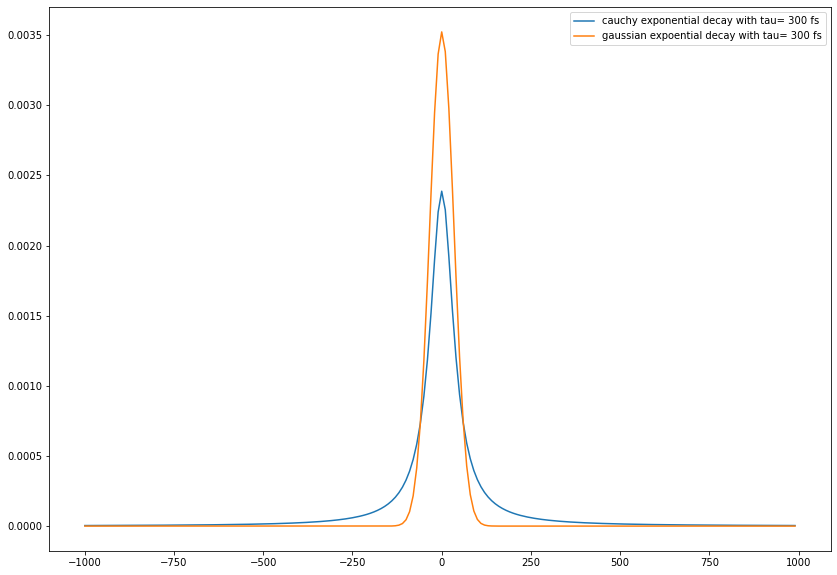

In [14]:
fwhm = np.array([fwhm])
tau = np.array([0.3])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 300 fs')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 300 fs')
plt.legend()
plt.show()

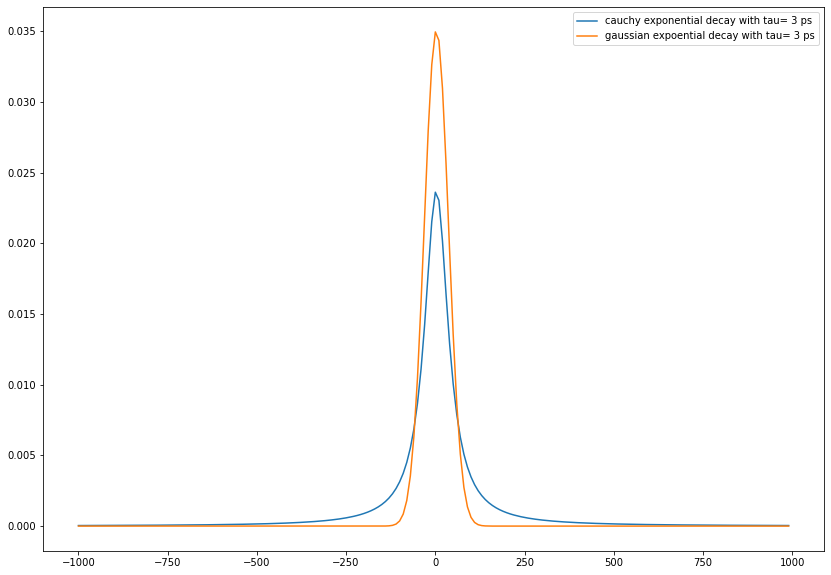

In [15]:
tau = np.array([3])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 3 ps')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 3 ps')
plt.legend()
plt.show()

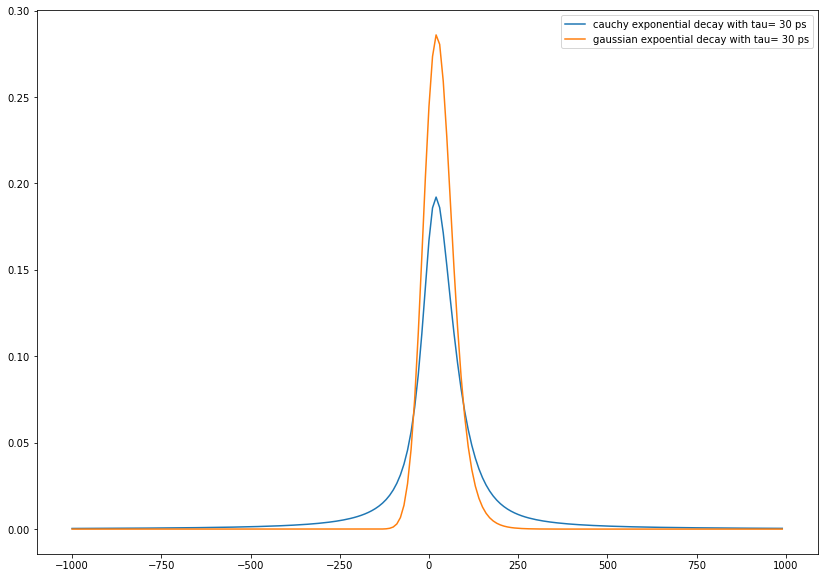

In [16]:
tau = np.array([30])
c = np.ones(1)
cauchy_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='c')
gauss_expdecay = model_n_comp_conv(t, fwhm, tau, c, base=False, irf='g')
plt.plot(t, cauchy_expdecay, label='cauchy exponential decay with tau= 30 ps')
plt.plot(t, gauss_expdecay, label='gaussian expoential decay with tau= 30 ps')
plt.legend()
plt.show()

## Conclusion
3rd gen X-ray source with 80 ps fwhm could not see fs dynamics. 